### The stock market is one of the most highly sought fields these days. Predicting how the stock price is going to behave will always keep us one step ahead.

Objective:
Visualize the data with the help of the following list of plots, and generate a few insights from the data.
* Time Plot
* Stacked Line Charts
* Box Plot
* Lag Plot
* Auto-Correlation Plot

### Datetime Module Learning

In [1]:
from datetime import datetime

# Creating a datetime object with the current date and time
current_datetime = datetime.now()
print(current_datetime)

from datetime import date

# Creating a date object
today = date.today()
print(today)

from datetime import time

# Creating a time object
current_time = time(hour=12, minute=30, second=45)
print(current_time)

from datetime import timedelta

# Creating a timedelta object
time_difference = timedelta(days=5, hours=3)


# Formatting a datetime object to a string
formatted_date = current_datetime.strftime('%Y-%m-%d %H:%M:%S')
print(formatted_date)

# Parsing a string into a datetime object
parsed_date = datetime.strptime('2022-01-15 08:30:00', '%Y-%m-%d %H:%M:%S')
print(parsed_date)

from datetime import datetime, timezone, timedelta

# Creating a datetime object with timezone information
dt_with_timezone = datetime(2022, 1, 15, 12, 0, tzinfo=timezone(timedelta(hours=5)))
print(dt_with_timezone)

2024-01-18 15:00:13.108092
2024-01-18
12:30:45
2024-01-18 15:00:13
2022-01-15 08:30:00
2022-01-15 12:00:00+05:00


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data set

ts = pd.read_csv("stock_price.csv")
ts.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
ts.tail()

,ds,y
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


In [5]:
ts['ds'] = pd.to_datetime(ts['ds'])

In [6]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      204 non-null    datetime64[ns]
 1   y       204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [7]:
ts.shape

(204, 2)

#### Time Plot

Text(0.5, 1.0, 'Stock Price')

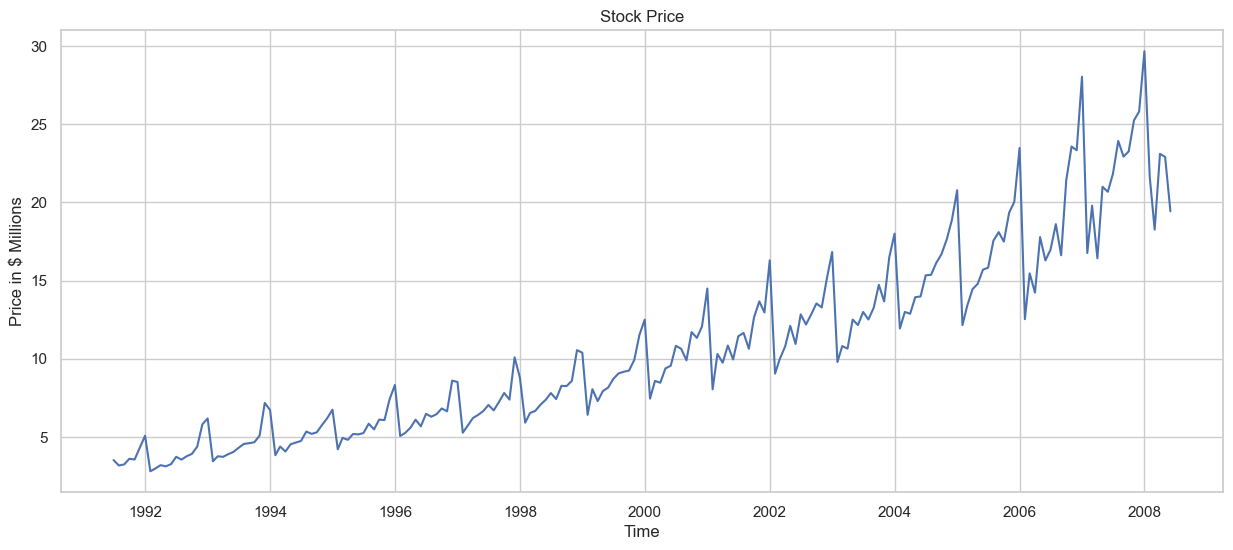

In [8]:
#plt.figure(figsize=(16, 6)) - not needed as already set at the beginning
plt.plot(ts["ds"], ts["y"])
plt.xlabel("Time")
plt.ylabel("Price in $ Millions")
plt.title("Stock Price")

Insights from the Time Plot
* There is a clear and increasing trend
* There is also a strong seasonal pattern that increases in size as the level of the series increases

#### Stacked Line Charts
* These are another way of viewing the time-series data
* Here, we have kept the month on the x-axis, revenue on the y-axis, and year in colo

In [9]:
ts['year'] = ts['ds'].dt.year

In [10]:
ts['month'] = ts['ds'].dt.strftime('%b')  # %b is abbrevated month code

In [11]:
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


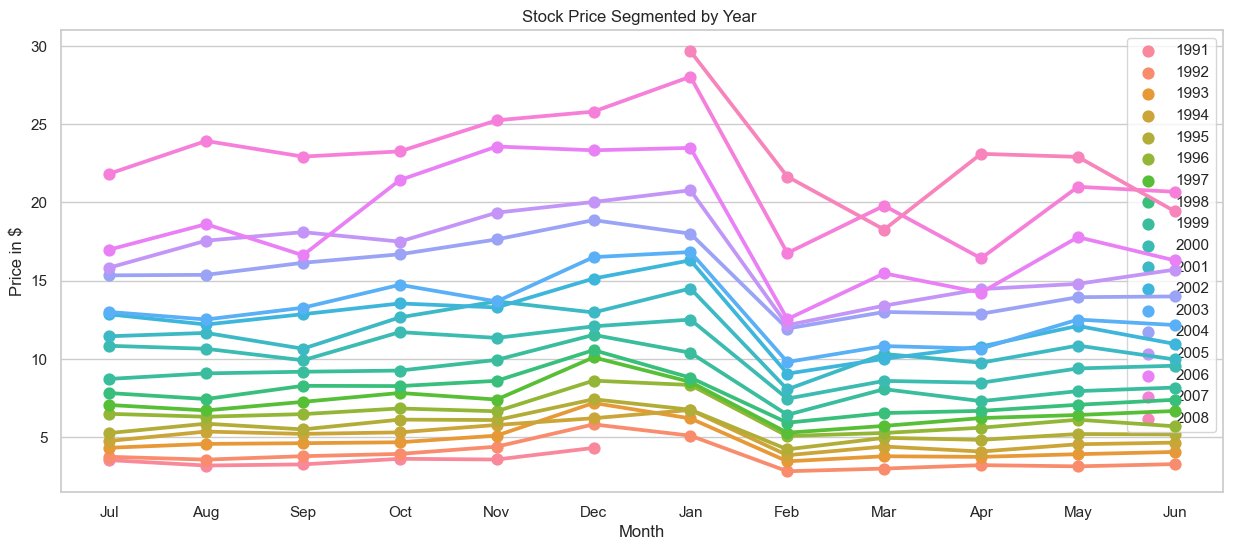

In [12]:
# pointplot

sns.pointplot(x="month", y="y", hue="year", data=ts, order=['Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec',
                                                            'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.xlabel("Month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")
plt.legend(loc='upper right')
plt.show()

Insights from the Stacked Line Charts
* There is a large jump in price in January each year.
* The graph also shows the drop in the price in March 2008 (most of the other years show an increase between Februaryand March.)

#### Boxplot

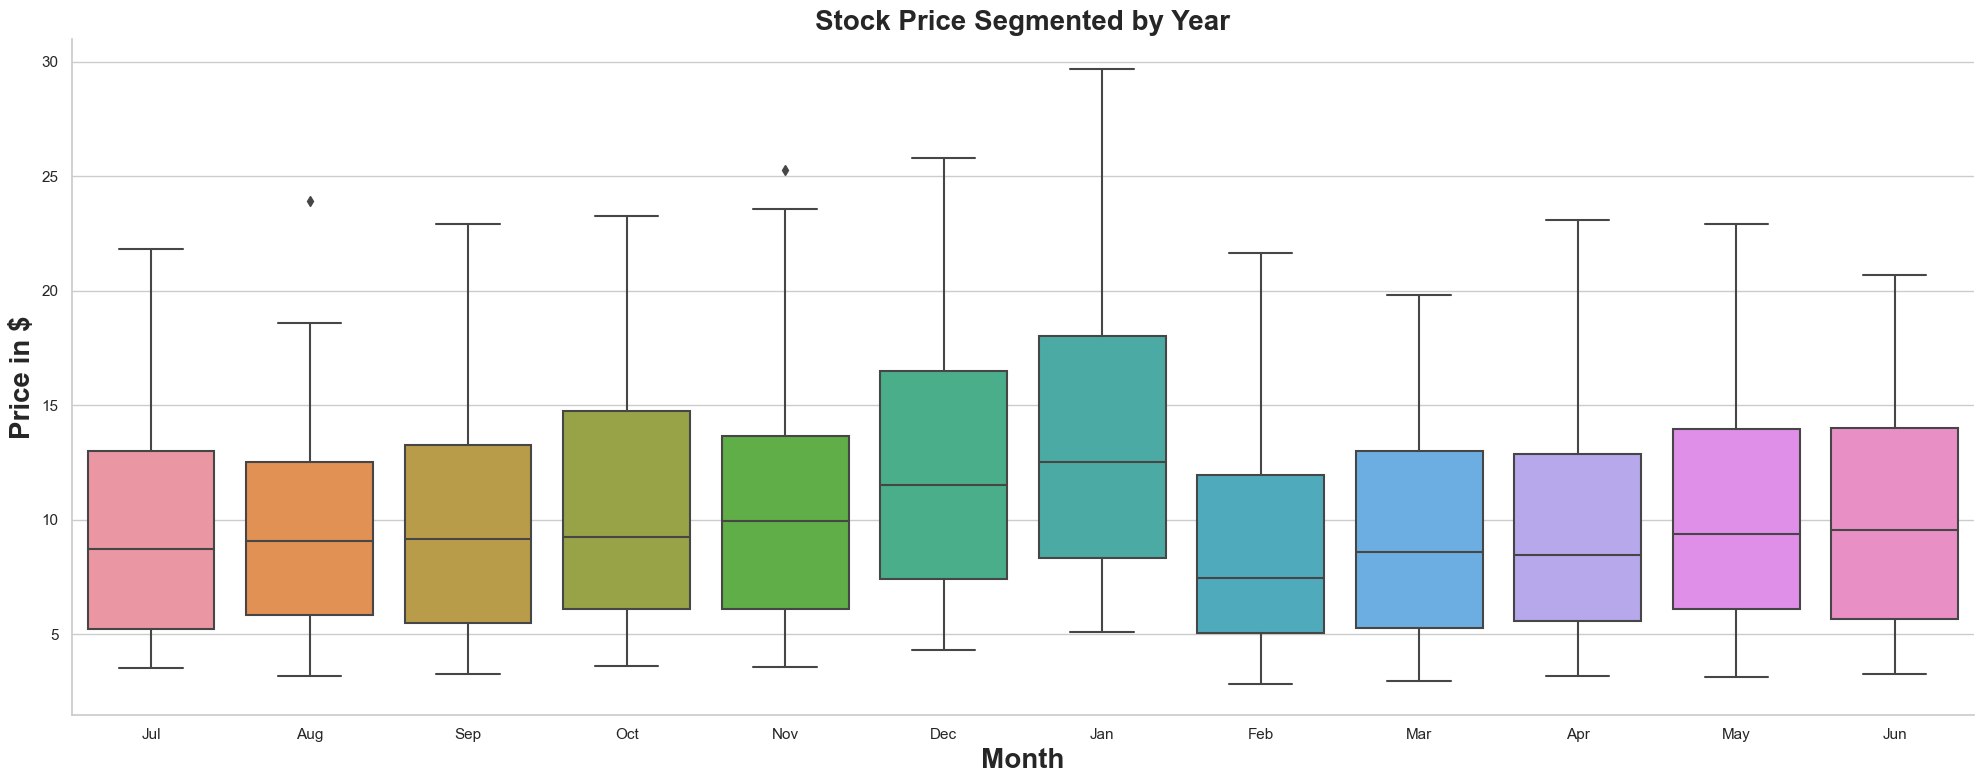

In [13]:
sns.catplot(x="month", y="y", data=ts, kind="box", row_order=['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            height=8, aspect=float(15/6))
plt.xlabel("Month", fontweight='bold',fontsize= 20)
plt.ylabel("Price in $",fontweight='bold',fontsize= 20)
plt.title("Stock Price Segmented by Year",fontweight='bold',fontsize= 20)
plt.tight_layout()
plt.show()

Insights from Box Plot
* There are fluctuations in stock prices of different months.
* The graph also shows outliers in August and November which are represented by small dots.

### Lag Plot
* A lag plot checks whether a dataset or time-series is random or not.
* Random data should not exhibit any identifiable structure in the lag plot.
* Nonrandom structure in the lag plot indicates the lack of randomness in the underlying data.

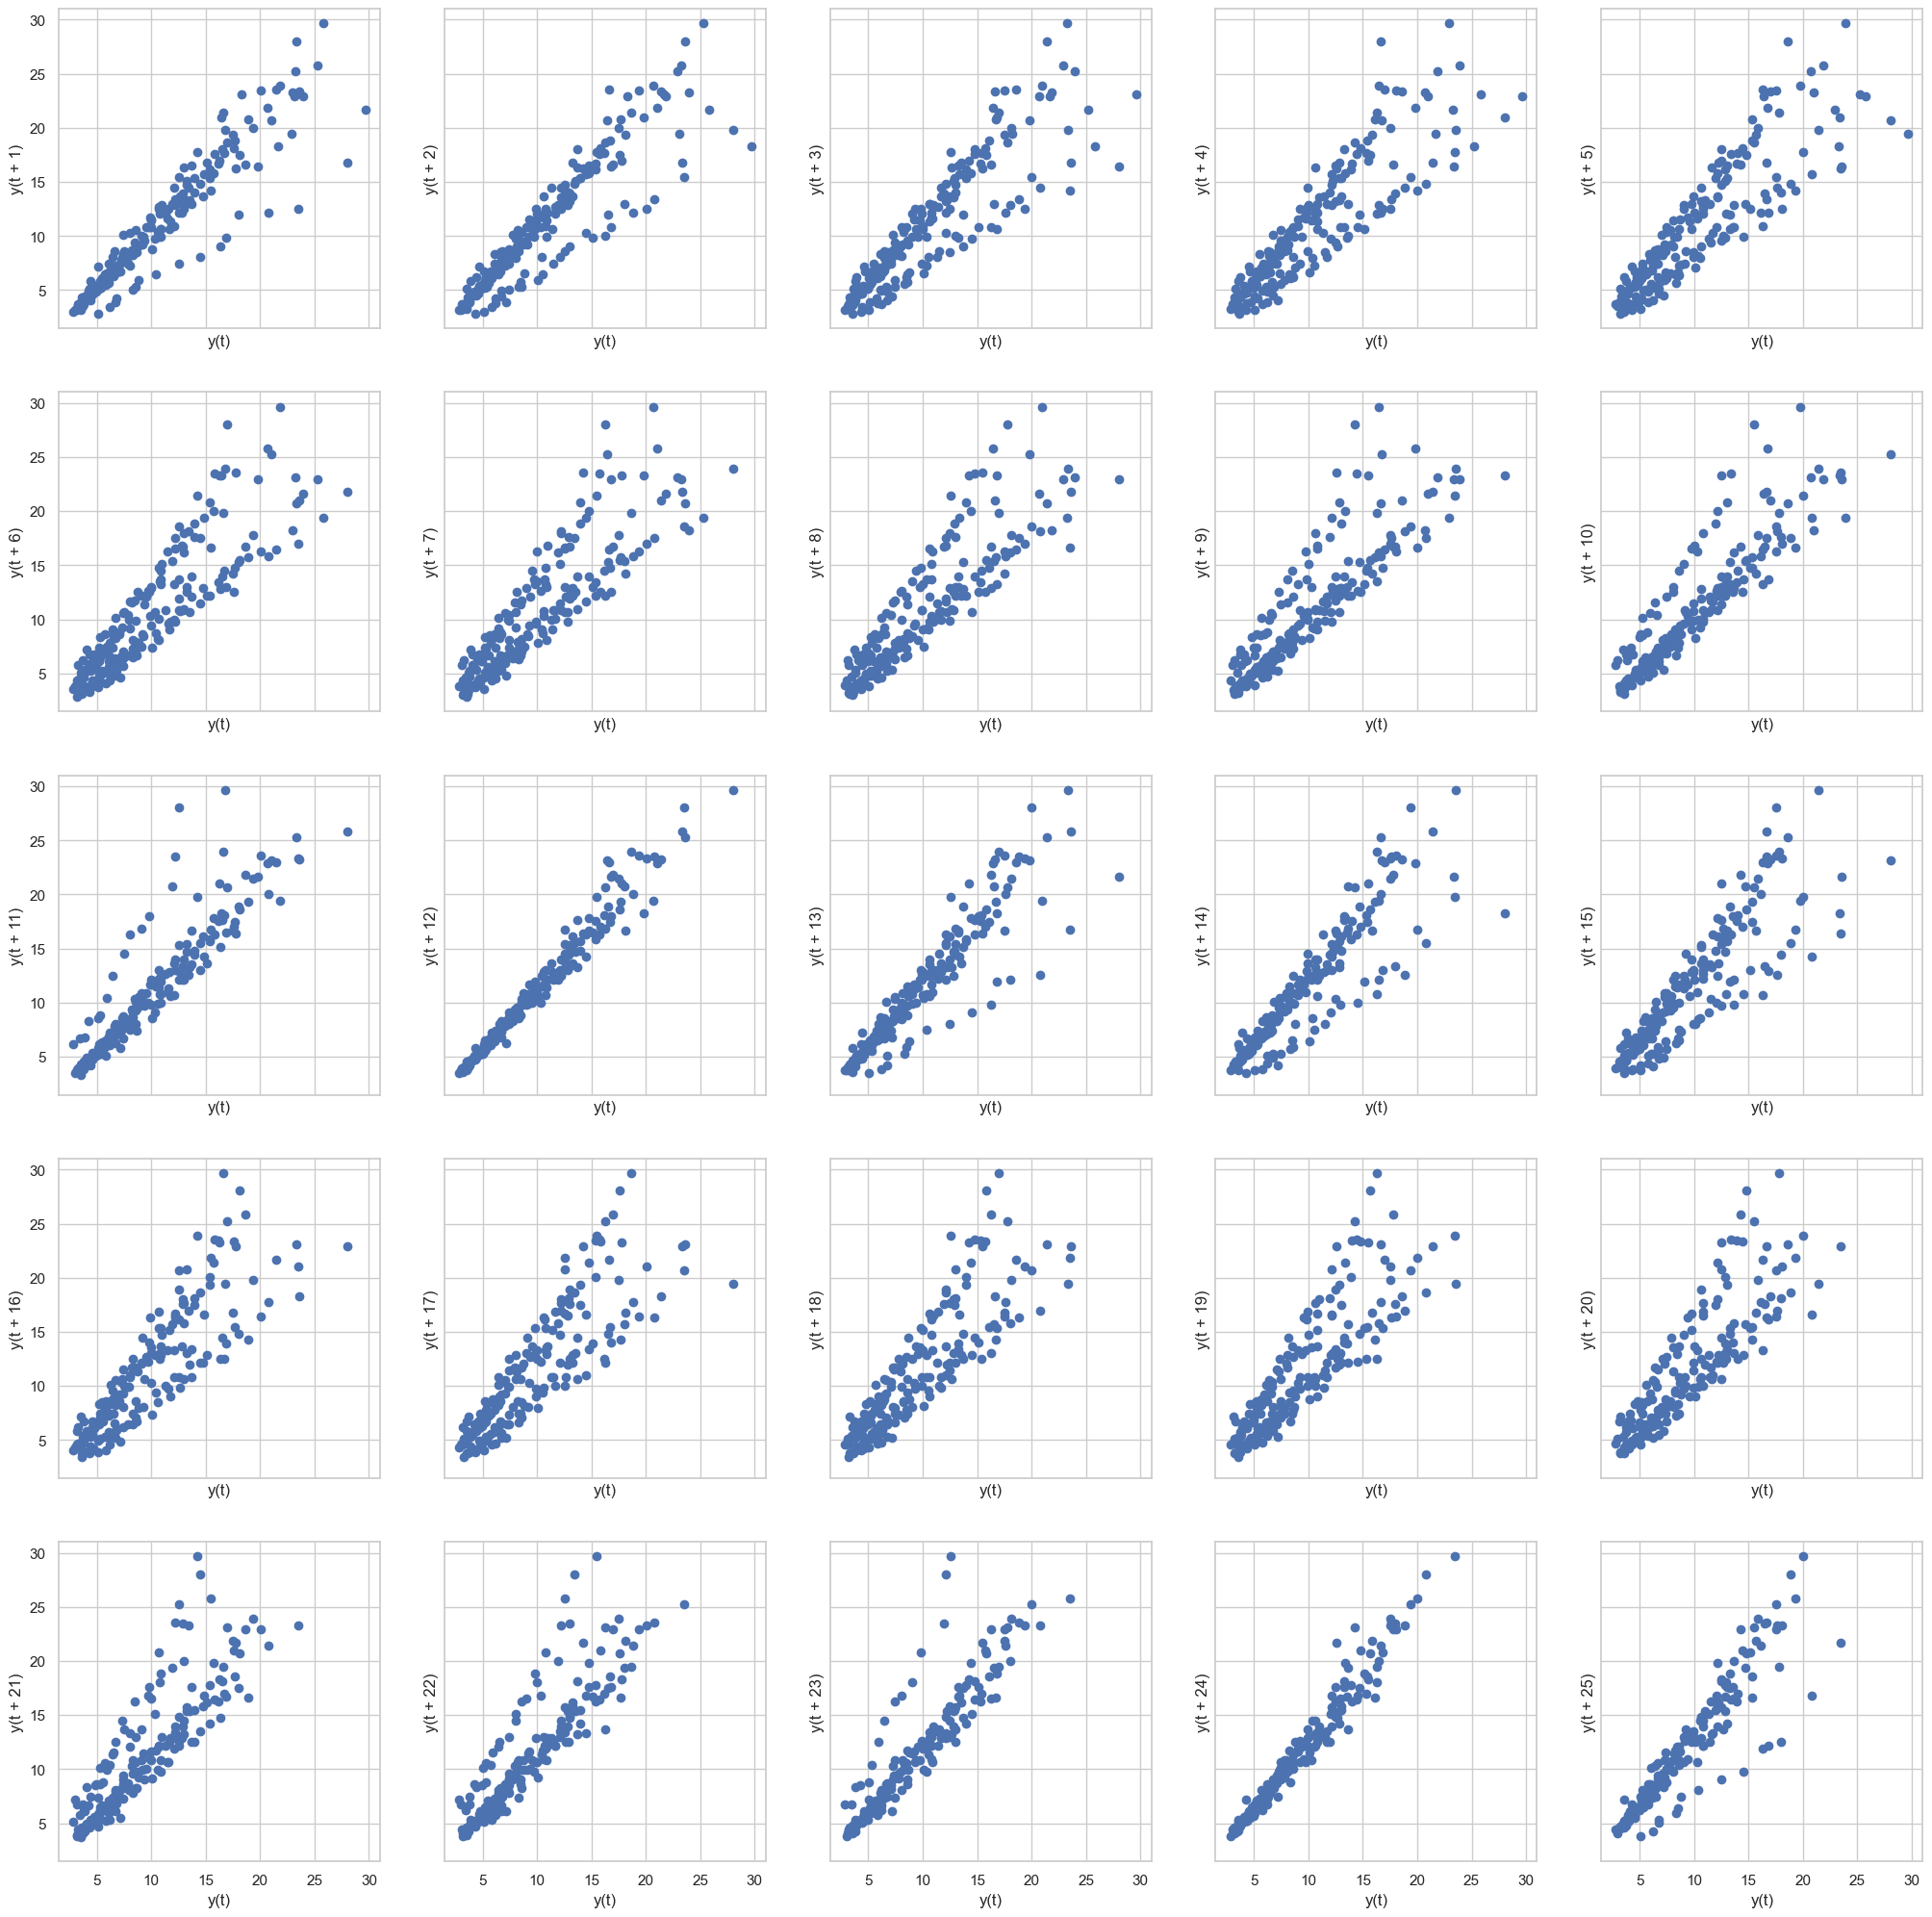

In [14]:
# plotting 25 lag plots to determine randomness in data

from pandas.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count = 1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts['y'], lag=count, ax=axes[i,j])
        count +=1

Insights from Lag Plot
* The plot displays patterns, indicating that the data is not random.

### Autocorrelation Plot
* It is designed to show whether the elements of a time-series are positively correlated, negatively correlated, or
independent of each other.
* Correlation simply means association, and measures how closely two variables are related.
* A positive correlation is a two-variable association in which both variables move in the same direction. As a result,when
one variable increases the other increases, or when one variable decreases the other decreases.
* A negative correlation is a link between two variables in which an increase in one variable causes the other to decrease.
When there is no correlation between two variables, it is called a zero correlation.
* It is similar to lag plots.

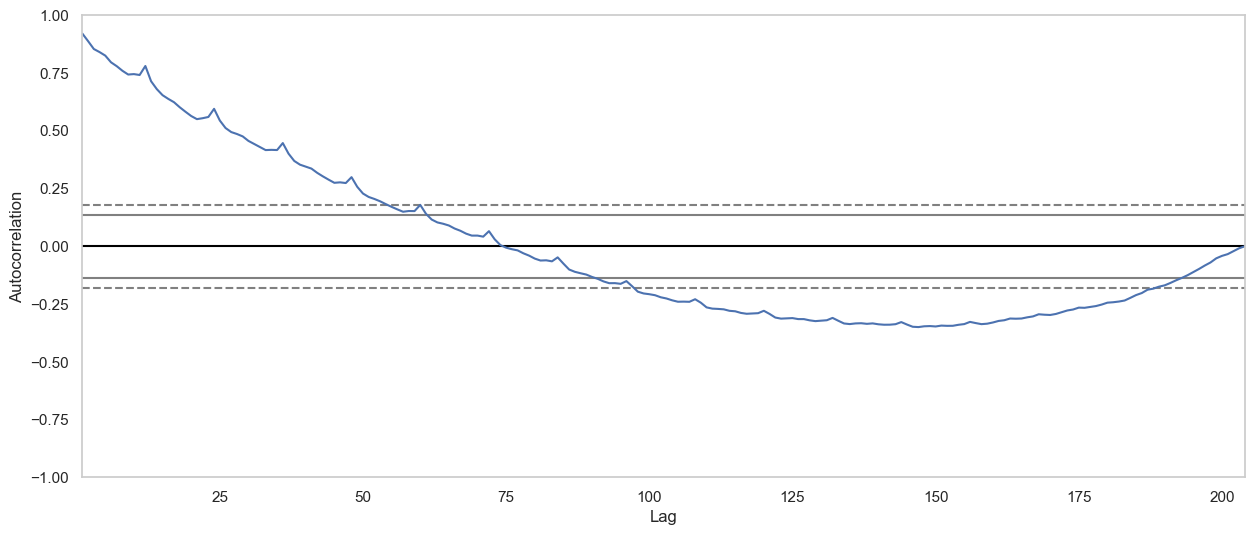

In [15]:
# Plotting graph to determine autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts["y"])
plt.show()

Insights from Autocorrelation Plot
* The graph depicts a downward trending negative trend from left to right, indicating negative autocorrelation.

#### Decomposing to see white noise

In [16]:
decompose = ts[['ds', 'y']]

In [17]:
decompose.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [18]:
decompose.index= ts['ds']

In [19]:
decompose.head()

,ds,y
ds,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869


In [20]:
decompose = decompose[['y']]

In [21]:
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


##### Importing Decomposition model and plotting graph on Trend, Seasonality, and Residuals

In [22]:
#Importing Decompose Model and plotting graph to see Trend, Seasonality, and Residuals 

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(decompose)

In [23]:
trend = decomposition.trend
trend[:5]

ds
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
Name: trend, dtype: float64

In [24]:
seasonal = decomposition.seasonal
seasonal[:5]

ds
1991-07-01   -0.227809
1991-08-01   -0.023116
1991-09-01   -0.149022
1991-10-01    0.569161
1991-11-01    0.966836
Name: seasonal, dtype: float64

In [25]:
residual = decomposition.resid
residual[:5]

ds
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
Name: resid, dtype: float64

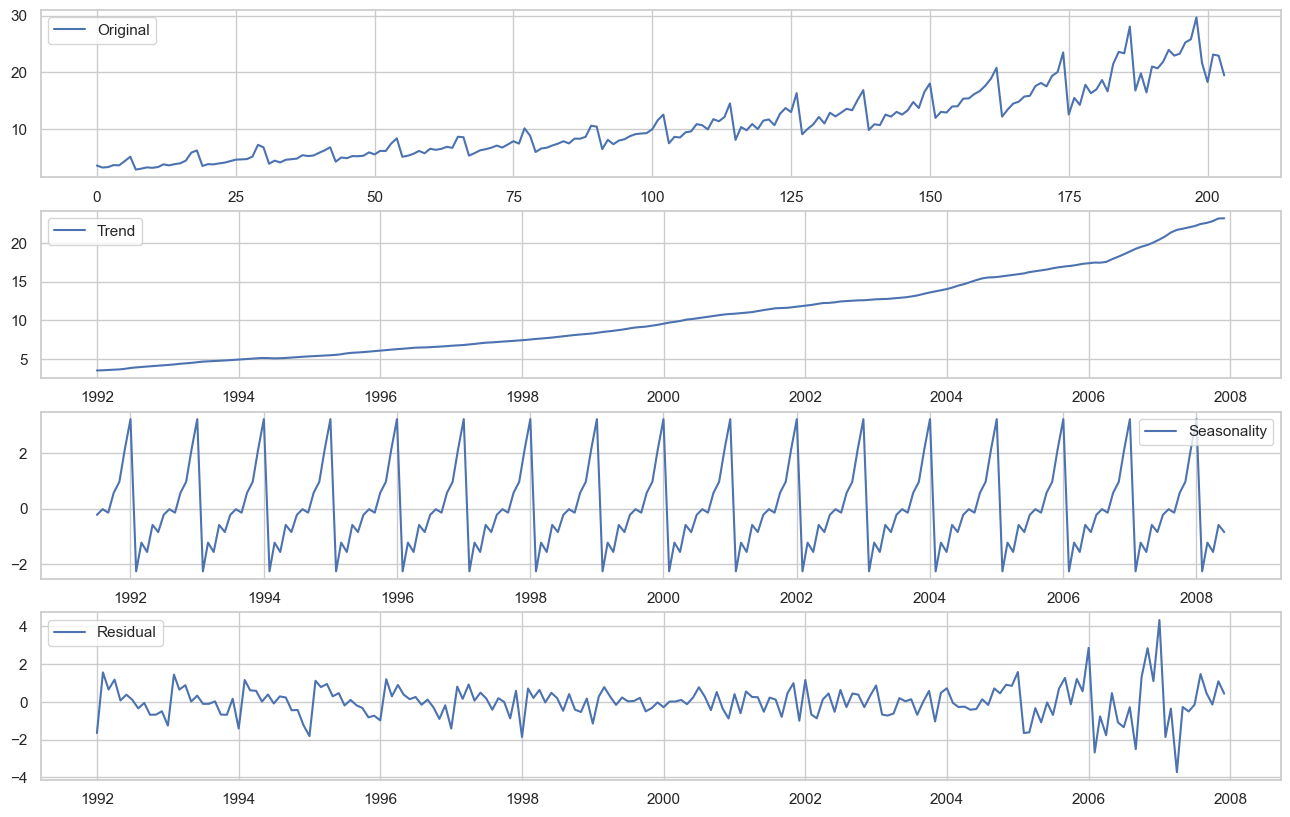

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(ts['y'], label= 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')

Insights from Decomposition model
* The graph depicts a raise in trend, seasonality, and residuals over the period from 1992 to 2008

#### We have learned all the components to build a time-series predictive model, so let's proceed to step 2

##### Problem Statement:
* The stock market is one of the most highly sought fields nowadays. Predicting how the stock price is going to behave will
always keep us one step ahead.


##### Objective:
* Check for the stationarity of your data using the Rolling Statistics and Dickey-Fuller test. If stationarity is present, remove
it using differencing in Python.

In [27]:
# import libraries

import datetime
import math
from sklearn.metrics import mean_squared_error

In [28]:
# import the data and split

tss = pd.read_csv('stock_price.csv')

In [29]:
tss['ds'] = pd.to_datetime(tss['ds'])

In [30]:
tss.index = tss['ds']

In [31]:
tss = tss[['y']]

In [32]:
print("Shape:",tss.shape)
tss.head()

Shape: (204, 1)


,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [33]:
X_train = tss[tss.index < datetime.datetime(2005,1,1,0,0,0)]
X_test = tss[tss.index >= datetime.datetime(2005,1,1,0,0,0)]

In [34]:
print(X_train.shape)
print(X_test.shape)

(162, 1)
(42, 1)


##### stationarity Check

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
dftest = adfuller(X_train.y, autolag = 'AIC')

In [37]:
dftest  # these are test results

(2.2282996805049953,
 0.9989049941867124,
 14,
 147,
 {'1%': -3.4756368462466662,
  '5%': -2.8814104466172608,
  '10%': -2.5773652982553568},
 260.9169725847081)

In [38]:
dftest[:4]

(2.2282996805049953, 0.9989049941867124, 14, 147)

In [39]:
pd.Series(dftest[0:4])

0      2.228300
1      0.998905
2     14.000000
3    147.000000
dtype: float64

In [40]:
# printing the 1st 4 test results and putting the index to them
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic:', 'p-value:', '#Lags Used:', 'Number of observations used:'])
dfoutput

Test Statistic:                   2.228300
p-value:                          0.998905
#Lags Used:                      14.000000
Number of observations used:    147.000000
dtype: float64

In [41]:
dftest[4]

{'1%': -3.4756368462466662,
 '5%': -2.8814104466172608,
 '10%': -2.5773652982553568}

In [42]:
# unpacking the critical values in the result and adding it to the dfoutput
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s):'%key] = value

In [43]:
dfoutput

Test Statistic:                   2.228300
p-value:                          0.998905
#Lags Used:                      14.000000
Number of observations used:    147.000000
Critical Value (1%):             -3.475637
Critical Value (5%):             -2.881410
Critical Value (10%):            -2.577365
dtype: float64

Putting all the above in a function

In [44]:
# Defining a custom function to perform Stationarity Test on the data

def stationarity_test(data):
    dftest = adfuller(data.y, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics:', 'p-value:', '#Lags Used:',
                                            'No. of Observations used:'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s):'%key] = value
    print("Dickey-Fuller Test Results:\n")
    print(dfoutput)
    
    print()
    print("Rolling statistics:")
    plt.plot(data.index, data.y)
    plt.show()
    
    print("Hypothesis Testing:\n")
    print("Null Hypothesis: Data is non-stationary.")
    print("Alternative Hypothesis: Data is Stationary.")
    print("-------------------\n")
    
    if dftest[1] < 0.05:
        print('Reject Null Hypothesis.')
    else:
        print('As Test statistics is greater than critical value(0.05), Failed to reject the Null Hypothesis.')
        print('Need to apply decomposition or differencing to reduce stationarity.')

Dickey-Fuller Test Results:

Test Statistics:               2.228300
p-value:                       0.998905
#Lags Used:                   14.000000
No. of Observations used:    147.000000
Critical Value (1%):          -3.475637
Critical Value (5%):          -2.881410
Critical Value (10%):         -2.577365
dtype: float64

Rolling statistics:


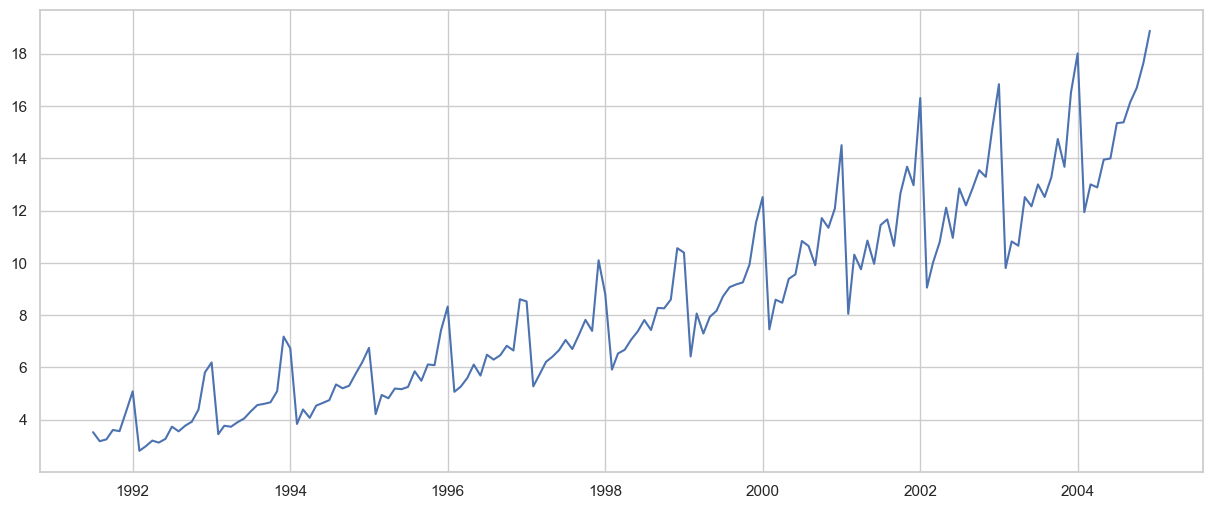

Hypothesis Testing:

Null Hypothesis: Data is non-stationary.
Alternative Hypothesis: Data is Stationary.
-------------------

As Test statistics is greater than critical value(0.05), Failed to reject the Null Hypothesis.
Need to apply decomposition or differencing to reduce stationarity.


In [45]:
# using X_train data in the function

stationarity_test(X_train)

Insights from Stationary Check
* The data is highly nonstationary.
* We need to apply log transformations to make variance constant.
* The test statistic is more than the critical value, and the moving average is not constant over time

##### Log transformation to make the variance constant

In [46]:
log_train = X_train
log_train = log_train['y'].apply(lambda x : math.log(x+1))
log_train = pd.DataFrame(log_train)

In [47]:
log_train.head()

,y
ds,
1991-07-01,1.509969
1991-08-01,1.430524
1991-09-01,1.447441
1991-10-01,1.528445
1991-11-01,1.518609


Dickey-Fuller Test Results:

Test Statistics:              -0.660497
p-value:                       0.856718
#Lags Used:                   14.000000
No. of Observations used:    147.000000
Critical Value (1%):          -3.475637
Critical Value (5%):          -2.881410
Critical Value (10%):         -2.577365
dtype: float64

Rolling statistics:


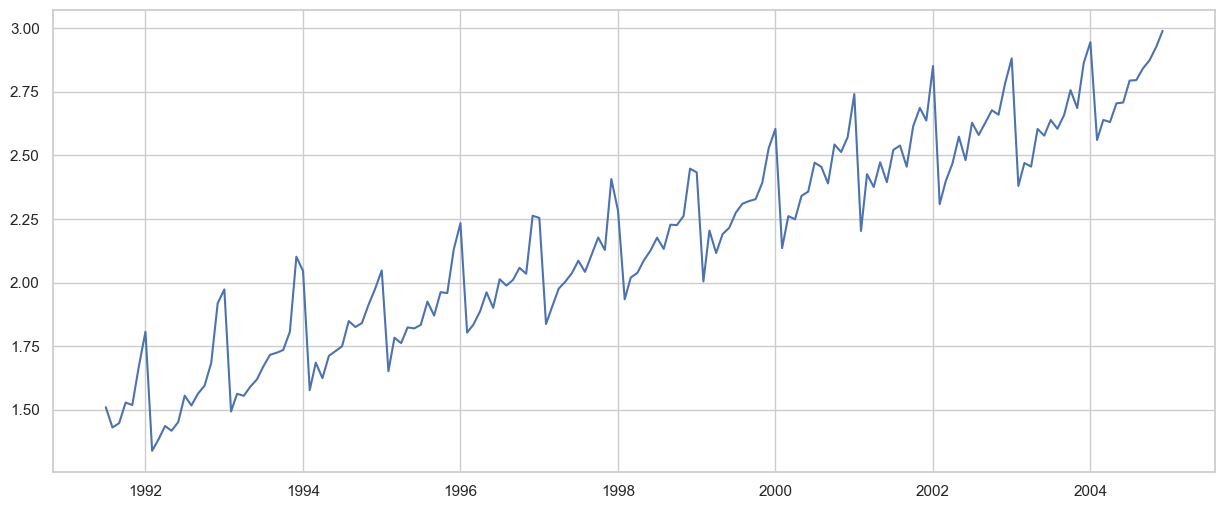

Hypothesis Testing:

Null Hypothesis: Data is non-stationary.
Alternative Hypothesis: Data is Stationary.
-------------------

As Test statistics is greater than critical value(0.05), Failed to reject the Null Hypothesis.
Need to apply decomposition or differencing to reduce stationarity.


In [48]:
# Re check for stationary using the function

stationarity_test(log_train)

#### Reason for Log(x+1)

* The addition of 1 to the variable before taking the logarithm, i.e., `log(x + 1)`, is a common technique used in data transformation, especially when dealing with data that includes zero values or values close to zero. The purpose of this addition is to handle cases where the logarithm of zero or a very small positive number might cause issues.

* When `x` is close to zero, `log(x)` approaches negative infinity. Taking the logarithm of zero is undefined, and dealing with negative infinity in calculations can lead to numerical instability and other problems.

* By adding 1 before taking the logarithm (`log(x + 1)`), you ensure that the argument of the logarithm is always positive. This transformation is often used when working with data that includes counts, percentages, or other variables that might contain zero values. It helps to stabilize the variance and avoid mathematical issues associated with taking the logarithm of small or zero values.

* For example, if `x` is zero, `log(0 + 1)` becomes `log(1)`, which is zero. This prevents the logarithm from being undefined and allows the transformation to be applied uniformly to a wider range of data values.

Insights from Stationary Check
* The data is still highly nonstationary, but the variance has become constant.


Let's remove seasonality and check; subtracting every nth term with n-1th term will let us do this.

In [49]:
first_diff = log_train['y'] - log_train['y'].shift(1)

In [50]:
first_diff[:5] # note null value in 1st row

ds
1991-07-01         NaN
1991-08-01   -0.079445
1991-09-01    0.016917
1991-10-01    0.081004
1991-11-01   -0.009837
Name: y, dtype: float64

In [51]:
first_diff = first_diff.fillna(0)
first_diff[:5]  # added 0 to null

ds
1991-07-01    0.000000
1991-08-01   -0.079445
1991-09-01    0.016917
1991-10-01    0.081004
1991-11-01   -0.009837
Name: y, dtype: float64

In [52]:
first_diff= pd.DataFrame(first_diff)

In [53]:
first_diff.head()

,y
ds,
1991-07-01,0.000000
1991-08-01,-0.079445
1991-09-01,0.016917
1991-10-01,0.081004
1991-11-01,-0.009837


Dickey-Fuller Test Results:

Test Statistics:              -4.034900
p-value:                       0.001238
#Lags Used:                   13.000000
No. of Observations used:    148.000000
Critical Value (1%):          -3.475325
Critical Value (5%):          -2.881275
Critical Value (10%):         -2.577293
dtype: float64

Rolling statistics:


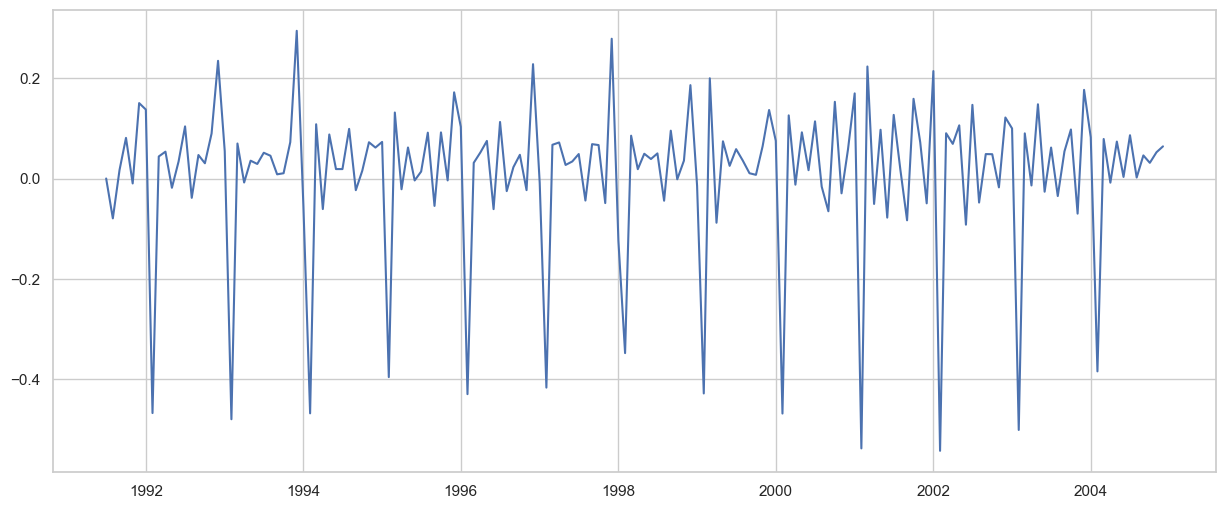

Hypothesis Testing:

Null Hypothesis: Data is non-stationary.
Alternative Hypothesis: Data is Stationary.
-------------------

Reject Null Hypothesis.


In [54]:
# Re check the stationarity

stationarity_test(first_diff)

#### Insights from Stationary Check
* The P-value is less than 0.05, and we have achieved stationarity.
* A time-series with cyclic behavior (but with no trend or seasonality) is stationary. This is because the cycles are not of a
fixed length, so before we observe the series, we cannot be sure where the peaks and troughs of the cycles will be.

###### Let’s also look at what happens if we use seasonal differencing. This might be useful when we model seasonal ARIMA model

In [55]:
# Using Seasonal Differentiating for stationary check

seasonal_data_differenced = log_train["y"] - log_train["y"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)

Dickey-Fuller Test Results:

Test Statistics:              -5.079978
p-value:                       0.000015
#Lags Used:                   11.000000
No. of Observations used:    150.000000
Critical Value (1%):          -3.474715
Critical Value (5%):          -2.881009
Critical Value (10%):         -2.577151
dtype: float64

Rolling statistics:


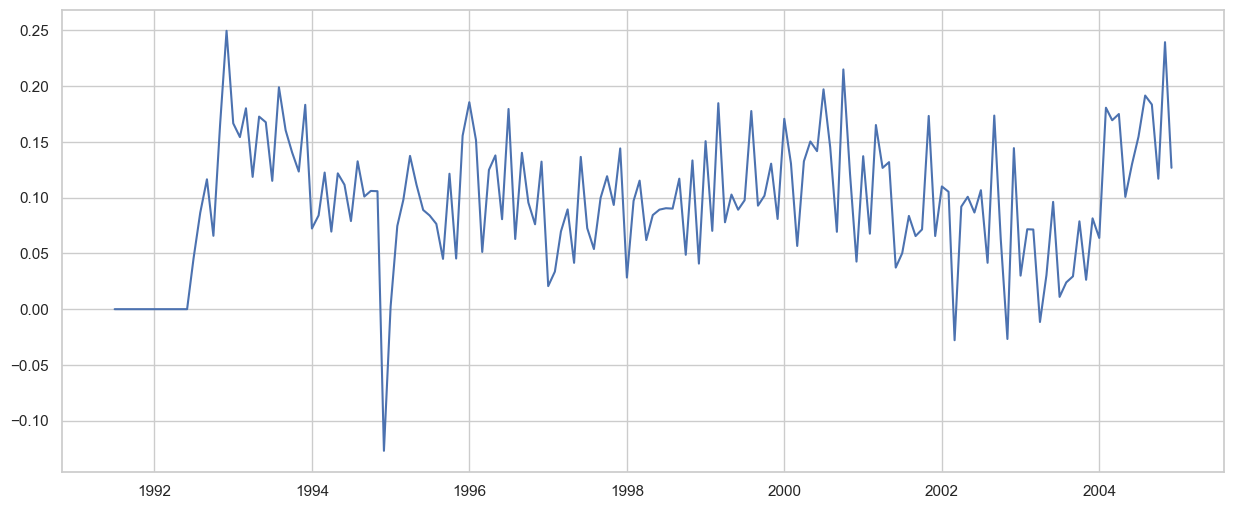

Hypothesis Testing:

Null Hypothesis: Data is non-stationary.
Alternative Hypothesis: Data is Stationary.
-------------------

Reject Null Hypothesis.


In [56]:
stationarity_test(seasonal_data_differenced)

###### Insights from Seasonal Differentiating
* The p-value is less than 0.05, and we can clearly see that the differencing has led to the stationarity of data.

#### Building ARIMA(p,d,q) model

* p = past values (lags)
* q = past forecast errors
* d = non seasonal differencing for stationarity

In [57]:
# Setting values for lag parameters for ACF and PACF

from statsmodels.tsa.stattools import acf, pacf

In [58]:
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols') # regression or Auto regressive model

In [59]:
print('ACF:\n',lag_acf)
print('PACF:\n',lag_pacf)

ACF:
 [ 1.         -0.28186541 -0.13464915 -0.02144517 -0.05849283 -0.02980579
  0.06294685 -0.0459743  -0.02318688 -0.03226056 -0.14315179 -0.20274074
  0.84790165 -0.23757407 -0.10026431 -0.06240588 -0.035645   -0.01234415
  0.03211695 -0.03283438 -0.01452861]
PACF:
 [ 1.         -0.28208504 -0.23330631 -0.1549805  -0.1765785  -0.17257489
 -0.07737937 -0.13128543 -0.14142273 -0.18705062 -0.39902844 -0.88296839
  0.21629434  0.21308971  0.20583258 -0.06438191  0.06510915  0.0528685
 -0.06333487  0.02889925  0.05291889]


In [60]:
len(first_diff)

162

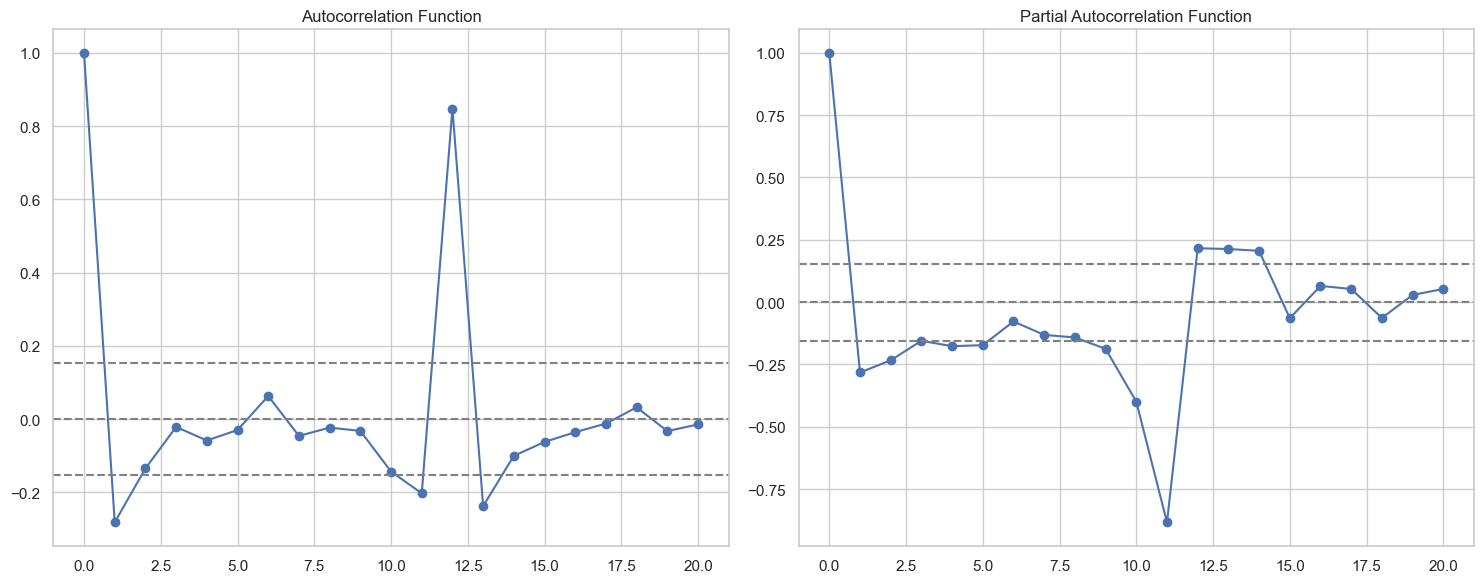

In [61]:
# plotting ACF plot
plt.subplot(121)
plt.plot(lag_acf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# plotting ACF plot
plt.subplot(122)
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Insights from ACF and PACF Plots
* 1. p: This is the lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely,
in this case, p=1 has a positive correlation and p=12 has a high negative correlation.
* 2. q: This is the lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely,
in this case, q=1 and q=12 have a very high positive correlation

###### Plotting the AR model

In [62]:
#Plotting AR Model with p=1, d=1, q=0 

from statsmodels.tsa.arima.model import ARIMA

In [63]:
model = ARIMA(log_train['y'], order = (1,1,0))

results_AR = model.fit()
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  162
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  77.556
Date:                Thu, 18 Jan 2024   AIC                           -151.113
Time:                        15:00:43   BIC                           -144.950
Sample:                    07-01-1991   HQIC                          -148.610
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2766      0.117     -2.363      0.018      -0.506      -0.047
sigma2         0.0223      0.002     13.027      0.000       0.019       0.026
Ljung-Box (L1) (Q):                   0.81   Jarque-

C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


4.197480892788326


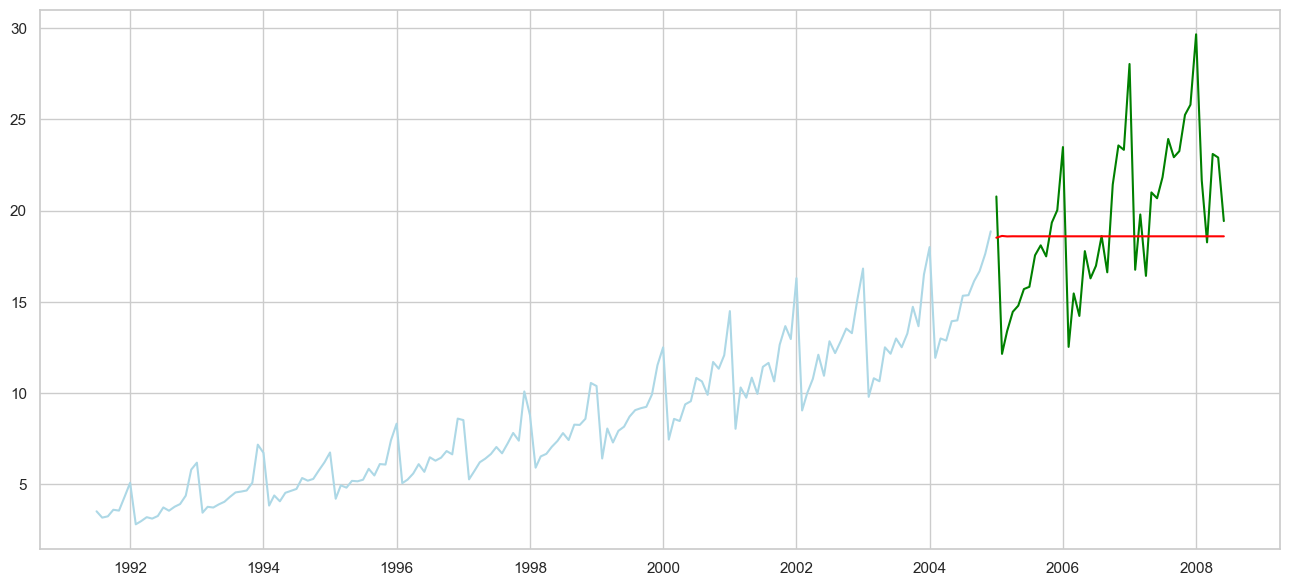

In [64]:
plt.figure(figsize=(16, 7))
plt.plot(X_train.index, X_train.values, color="lightblue")
plt.plot(X_test.index, X_test.values, color="green")

# Code for checking Forecasting
# Assuming results_AR is the fitted ARIMA model
#forecast_values = results_AR.forecast(steps=len(X_test))[0]

# Create a DataFrame from the forecasted values
#pred = pd.DataFrame({'Predicted': forecast_values}, index=X_test.index)

pred = pd.DataFrame(results_AR.forecast(len(X_test)))
pred.columns = ["yhat"]
pred.index = X_test.index

# Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

# Code for Measuring error. 
measure = math.pow(mean_squared_error(X_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

Insights from AR Model
* RMSE: 4.197. We can do better than this. Let's see what an MA model provides.

#### MA Model

In [65]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
# Plotting MA Model with p=0, d=1, q=1
model_MA = ARIMA(log_train, order=(0,1,1))
results_MA = model_MA.fit()
print(results_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  162
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  83.522
Date:                Thu, 18 Jan 2024   AIC                           -163.043
Time:                        15:00:44   BIC                           -156.880
Sample:                    07-01-1991   HQIC                          -160.541
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5982      0.051    -11.782      0.000      -0.698      -0.499
sigma2         0.0207      0.002      8.641      0.000       0.016       0.025
Ljung-Box (L1) (Q):                   3.05   Jarque-

C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


4.594799582881755


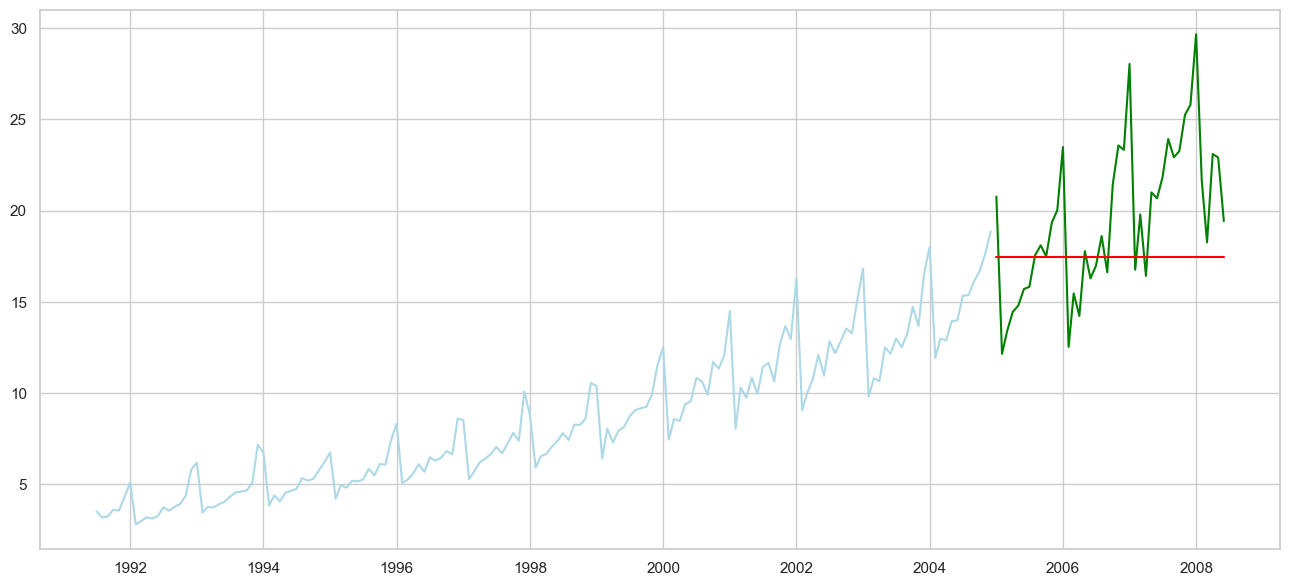

In [67]:
plt.figure(figsize=(16, 7))
plt.plot(X_train.index, X_train.values, color="lightblue")
plt.plot(X_test.index, X_test.values, color="green")

# Code for checking Forecasting
# Assuming results_AR is the fitted ARIMA model
#forecast_values = results_AR.forecast(steps=len(X_test))[0]

# Create a DataFrame from the forecasted values
#pred = pd.DataFrame({'Predicted': forecast_values}, index=X_test.index)

pred = pd.DataFrame(results_MA.forecast(len(X_test)))
pred.columns = ["yhat"]
pred.index = X_test.index

# Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

# Code for Measuring error. 
measure = math.pow(mean_squared_error(X_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

Insights from MA Model
* RMSE: 4.59. This is better than the AR model. MA is better at smoothing the time-series graph and gives a linear trend
while predicting.

#### ARIMA Model

C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\srika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  162
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  89.800
Date:                Thu, 18 Jan 2024   AIC                           -173.601
Time:                        15:00:46   BIC                           -164.357
Sample:                    07-01-1991   HQIC                          -169.847
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3484      0.195      1.783      0.075      -0.035       0.731
ma.L1         -0.8316      0.104     -7.979      0.000      -1.036      -0.627
sigma2         0.0191      0.002      9.459      0.0

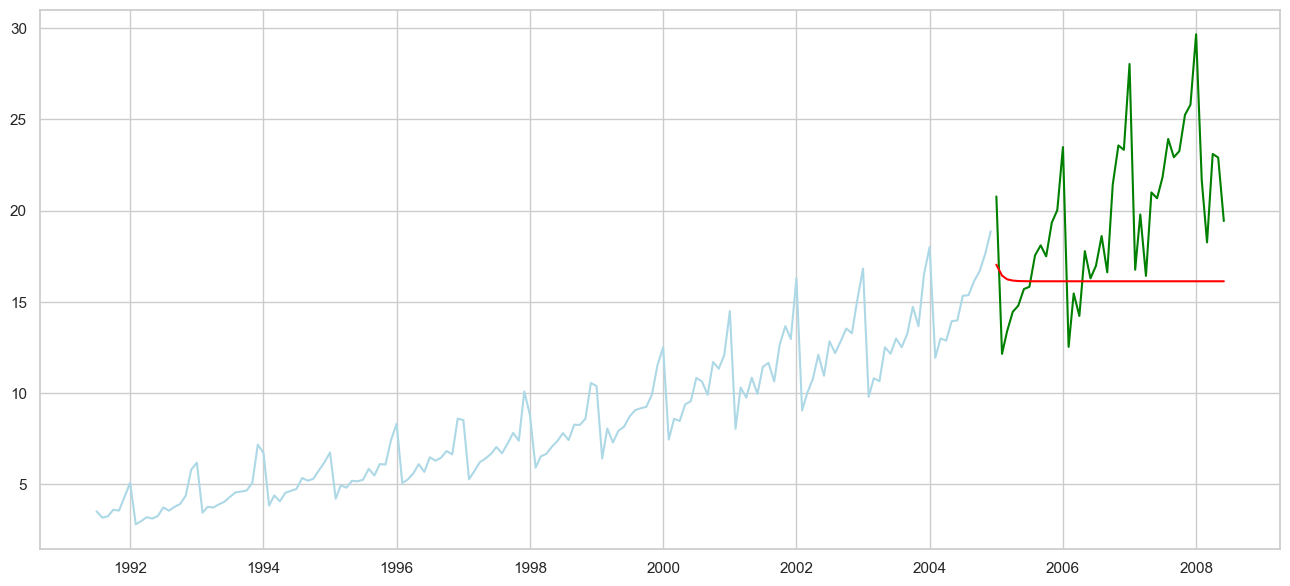

In [68]:
# Using both AR and MA with differencing and applying ARIMA Model with p=1, d=1, q=1 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1)) 
results_ARIMA = model.fit()
print(results_ARIMA.summary())
plt.figure(figsize=(16, 7))
plt.plot(X_train.index, X_train.values, color="lightblue")
plt.plot(X_test.index, X_test.values, color="green")
#Code for checking Forecasting
pred = pd.DataFrame(results_ARIMA.forecast(len(X_test)))
pred.columns = ["yhat"]
pred.index = X_test.index
#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)
#Code for Measuring error. 
measure = math.pow(mean_squared_error(X_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

END